In [121]:
import pandas as pd,numpy as np,seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Univariate analysis**
1. Visualiztion of single variable.
2. by looking at one variable at a time,we can build an intution for how each variable is distributed before moving on to more complex interactions between variables.
3. The main plot types of univariate visualizations:

Barchart

Histograms

**bar charts**

The primary visualization for choice for representing the distribution of a qualitative variable.

In a bar chart, each level of the categorical variable is depicted by a bar, whose height indicate the frequency of data points that take on that level.

To avoid information distortion, the baseline for the plot should start at zero. Otherwise, height differences between bars could look bigger than they actually are.

**sns.countplot function**

parameters
1. x, y, hue : names of variables in data or vector data
2. data : DataFrame, array, or list of arrays
3. order, hue_order : lists of strings
        Order to plot the categorical levels in
4. orient : “v” | “h”
        Orientation of the plot (vertical or horizontal)
5. color
6. palette : palette name, list, or dict
        Colors to use for the different levels of the hue variable
7. saturation
8. ax : matplotlib Axes
Axes object to draw the plot onto

In [22]:
pokemon = pd.read_csv("/content/pokemon_data.csv",encoding="latin-1")

In [23]:
pokemon.head()

,Sn no,Name,Upper Name,lower name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,BULBASAUR,bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,IVYSAUR,ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,VENUSAUR,venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,VENUSAURMEGA VENUSAUR,venusaurmega venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,CHARMANDER,charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [24]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sn no       799 non-null    int64 
 1   Name        799 non-null    object
 2   Upper Name  799 non-null    object
 3   lower name  799 non-null    object
 4   Type 1      799 non-null    object
 5   Type 2      413 non-null    object
 6   HP          799 non-null    int64 
 7   Attack      799 non-null    int64 
 8   Defense     799 non-null    int64 
 9   Sp. Atk     799 non-null    int64 
 10  Sp. Def     799 non-null    int64 
 11  Speed       799 non-null    int64 
 12  Generation  799 non-null    int64 
 13  Legendary   799 non-null    bool  
dtypes: bool(1), int64(8), object(5)
memory usage: 82.1+ KB


In [25]:
pokemon["Type 2"].fillna(pokemon["Type 2"].mode()[0],inplace=True)

In [26]:
pokemon.isnull().sum()

Sn no         0
Name          0
Upper Name    0
lower name    0
Type 1        0
Type 2        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [27]:
pokemon.shape

(799, 14)

In [28]:
pokemon["Generation"].value_counts(ascending=False)

1    166
5    165
3    160
4    121
2    106
6     81
Name: Generation, dtype: int64

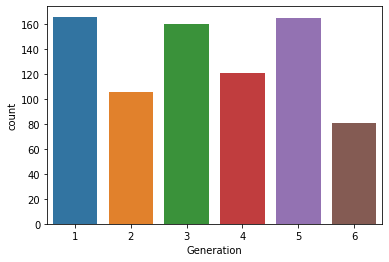

In [29]:
sns.countplot(data=pokemon,x="Generation");
#The semicolon ";" suppresses the printing of the plotting object information

By default, each level of the categorical variable is given a different color.

In [30]:
#This function returns a list of RGB tuples (3-tuple) corresponding to the color palette set in the function's arguments
#Each tuple consists of three digits specifying the Red, Green, and Blue channel values to specify a color
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [31]:
print(sns.color_palette())

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]


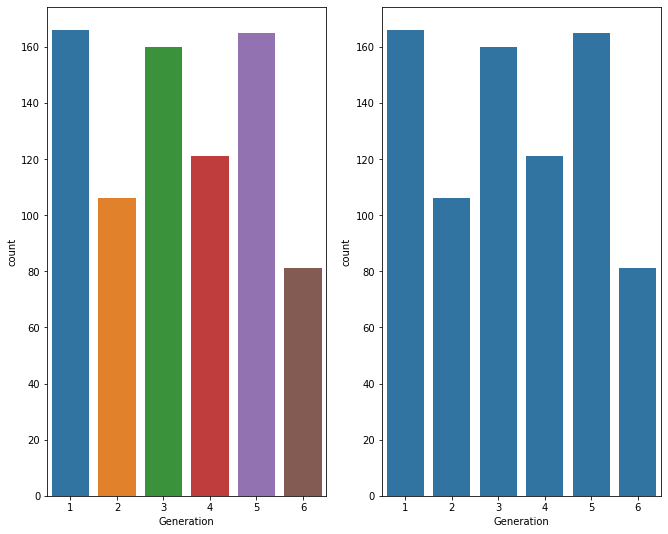

In [32]:
#Changing the color of the bars using the color parameter
plt.figure(figsize=(17,9))
plt.subplot(131)
base_color = sns.color_palette()[0]
sns.countplot(data=pokemon,x="Generation");
plt.subplot(132)
sns.countplot(data=pokemon,x="Generation",color=base_color);

For nominal data, you might want to arrange the bars in order of frequency with the most common on the left.

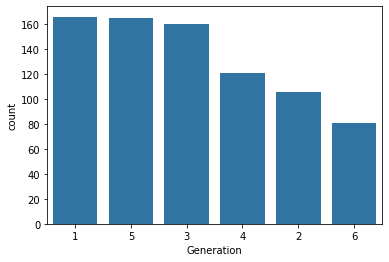

In [33]:
#The "order" parameter takes as an argument a list with the order in which bars should be plotted
gen_order=pokemon["Generation"].value_counts(ascending=False).index
sns.countplot(data=pokemon,x="Generation",color=base_color,order=gen_order)

In [34]:
pokemon.nunique()

Sn no         720
Name          799
Upper Name    799
lower name    799
Type 1         18
Type 2         18
HP             94
Attack        111
Defense       102
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

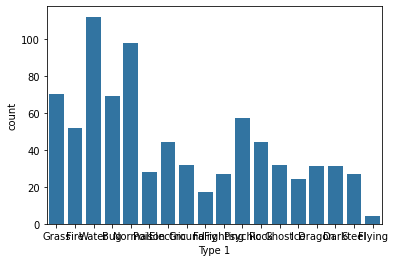

In [35]:
#The bar labels on the x axis are mostly unreadable due to overlap
sns.countplot(data=pokemon,x="Type 1",color=base_color);

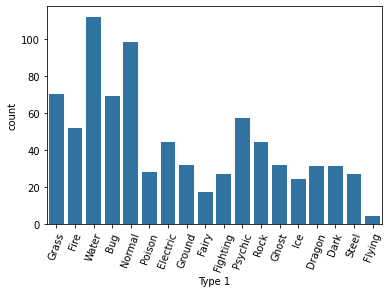

In [36]:
sns.countplot(data=pokemon,x="Type 1",color=base_color)
plt.xticks(rotation=70);

One common variation for bar chars is the horizontal bar chart.

In this variation, the chart is essentially turned 90 degrees clockwise.

If you have a lot of categories, or the category names are long, then the horizontal orientation can be more convenient in terms of the space needed to create a readable plot.

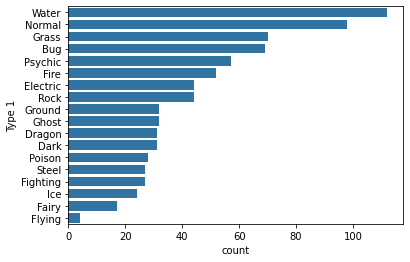

In [37]:
#horizontal bar chart x=vertical and y = horizontal
type_order=pokemon["Type 1"].value_counts().index
sns.countplot(data=pokemon,y="Type 1",color=base_color,order=type_order);

For ordinal data types, the inherent order of the levels is a more important feature to convey.

It is more important to know if the most common categories are lower or higher in the spectrum.

By converting the data into an ordered categorical data type, the order of categories becomes innate to the feature, and we won't need to specify an order parameter each time it's required in a plot.

In [38]:
import random
levels= ['Alpha', 'Beta', 'Gamma', 'Delta']
level = [random.choice(levels) for i in range(1000)]
df = pd.DataFrame({'id': range(1000), 'level':level})
df.head()

,id,level
0,0,Beta
1,1,Gamma
2,2,Delta
3,3,Gamma
4,4,Delta


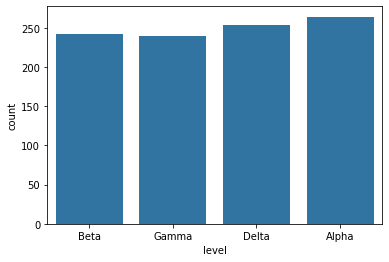

In [39]:
sns.countplot(data=df,x="level",color=base_color);

By default, Pandas reads in string data as object types, and will plot the bars in the order in which the unique values were seen.

In [40]:
#Convert the level data from an object data type into an ordered categorical data type
level_order = ['Alpha', 'Beta', 'Gamma', 'Delta']
ordered_cat = pd.api.types.CategoricalDtype(categories = level_order, ordered = True)
df['level'] = df['level'].astype(ordered_cat)

In [41]:
df["level"].dtypes

CategoricalDtype(categories=['Alpha', 'Beta', 'Gamma', 'Delta'], ordered=True)

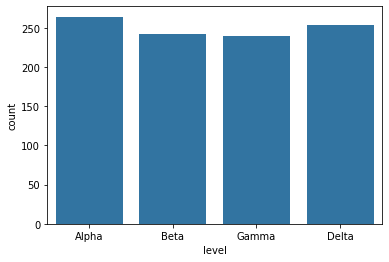

In [42]:
sns.countplot(data=df,x="level",color=base_color);

If your data is a pandas Series, 1-d array, or a list, you can set it as the first argument to the countplot function.

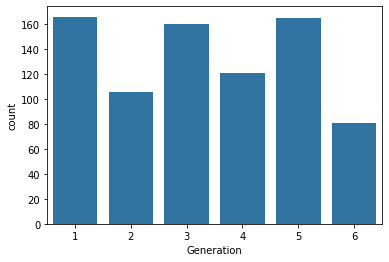

In [43]:
sns.countplot(x=pokemon["Generation"],color=base_color);

**Absolute vs. Relative Frequency**

Absolute frequency: number of data points on the length axis.

Relative frequency: the proportion of the data that falls in each category. i.e percentage of the each category.

Changing the count axis to relative proportions makes it much easier to see how much each category contributes to the whole.

In [44]:
pokemon.columns

Index(['Sn no', 'Name', 'Upper Name', 'lower name', 'Type 1', 'Type 2', 'HP',
       'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
       'Legendary'],
      dtype='object')

In [45]:
pokemon.head(3)

,Sn no,Name,Upper Name,lower name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,BULBASAUR,bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,IVYSAUR,ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,VENUSAUR,venusaur,Grass,Poison,80,82,83,100,100,80,1,False


In [46]:
pd.melt(pokemon,id_vars=["Sn no","Name"],value_vars=["Type 1","Type 2"],var_name="type_level",value_name="type")

,Sn no,Name,type_level,type
0,1,Bulbasaur,Type 1,Grass
1,2,Ivysaur,Type 1,Grass
2,3,Venusaur,Type 1,Grass
3,3,VenusaurMega Venusaur,Type 1,Grass
4,4,Charmander,Type 1,Fire
...,...,...,...,...
1593,719,Diancie,Type 2,Fairy
1594,719,DiancieMega Diancie,Type 2,Fairy
1595,720,HoopaHoopa Confined,Type 2,Ghost
1596,720,HoopaHoopa Unbound,Type 2,Dark


In [47]:
pkmn_types=pd.melt(pokemon,id_vars=["Sn no","Name"],value_vars=["Type 1","Type 2"],var_name="type_level",value_name="type")
pkmn_types[802:812]

,Sn no,Name,type_level,type
802,3,VenusaurMega Venusaur,Type 2,Poison
803,4,Charmander,Type 2,Flying
804,5,Charmeleon,Type 2,Flying
805,6,Charizard,Type 2,Flying
806,6,CharizardMega Charizard X,Type 2,Dragon
807,6,CharizardMega Charizard Y,Type 2,Flying
808,7,Squirtle,Type 2,Flying
809,8,Wartortle,Type 2,Flying
810,9,Blastoise,Type 2,Flying
811,9,BlastoiseMega Blastoise,Type 2,Flying


In [48]:
type_counts = pd.value_counts(pkmn_types['type'])
type_order = type_counts.index

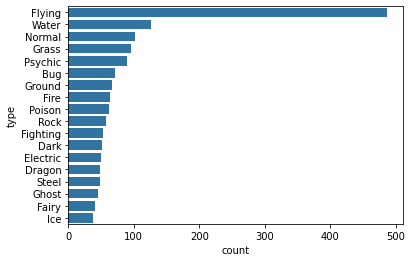

In [49]:
#By default, sns.countplot function will plot the data in terms of absolute frequency
sns.countplot(y = pkmn_types['type'], order = type_order, color = base_color);

In [50]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.609511889862328


In [51]:
tick_props = np.arange(0, max_prop, 0.10)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

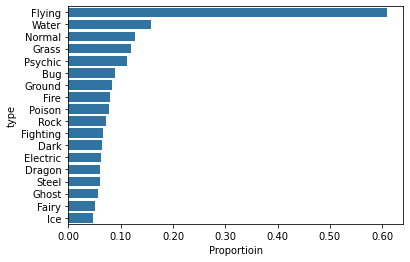

In [52]:
#Relative frequency: relabel the count axis in terms of proportions
sns.countplot(data = pkmn_types, y = 'type', order = type_order, color = base_color)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('Proportioin');

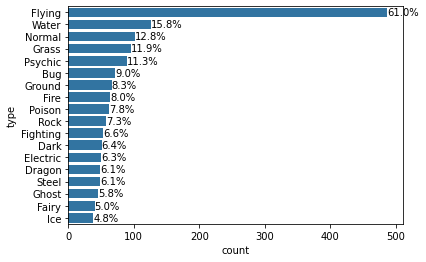

In [53]:
sns.countplot(data = pkmn_types, y = 'type', order = type_order, color = base_color)
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100 * (count / n_pokemon))
    plt.text(type_counts[i], i, pct_string, va = 'center')

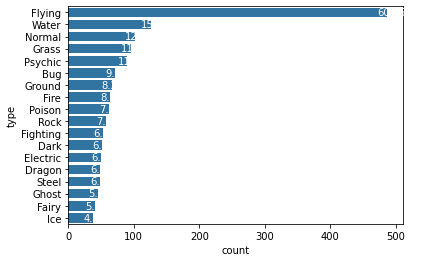

In [54]:
sns.countplot(data = pkmn_types, y = 'type', order = type_order, color = base_color)
locs, labels = plt.yticks()
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100 * count / n_pokemon)
    plt.text(count - 15, loc, pct_string, va = 'center', color = 'w')

plt.yticks() or plt.xticks() returns a 2-tuple containing an array of label positions as well as a silent list of label names.

Counting Missing Data

In [55]:
pokemon = pd.read_csv("/content/pokemon_data.csv",encoding="latin-1")
pokemon.head(2)

,Sn no,Name,Upper Name,lower name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,BULBASAUR,bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,IVYSAUR,ivysaur,Grass,Poison,60,62,63,80,80,60,1,False


In [56]:
pokemon.isnull().sum()

Sn no           0
Name            0
Upper Name      0
lower name      0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [57]:
pokemon.isnull().any(axis=0)

Sn no         False
Name          False
Upper Name    False
lower name    False
Type 1        False
Type 2         True
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool

In [58]:
pokemon.isnull().any(axis=1).sum()

386

sns.barplot function can be used to depict a summary of one quantitative variable against levels of a second qualitative variable.

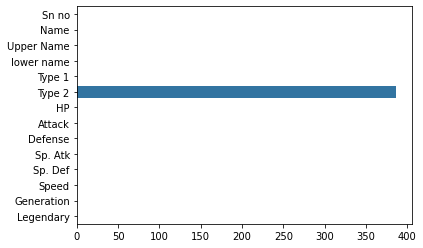

In [59]:
na_count=pokemon.isnull().sum()
sns.barplot(x=na_count,y=na_count.index,color=base_color);

**Pie Charts**

Pie charts are used for plotting **relative frequencies** for levels of a qualitative variable.ie.Percentage 

In a pie chart, each category is indicated by a slice of a circle, with the area of each slice idicating the relative frequency of that category.

In [60]:
pokemon.nunique()

Sn no         720
Name          799
Upper Name    799
lower name    799
Type 1         18
Type 2         18
HP             94
Attack        111
Defense       102
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

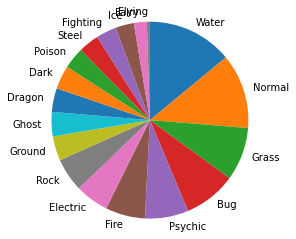

In [61]:
type_counts =pokemon["Type 1"].value_counts()
plt.pie(type_counts,labels=type_counts.index,startangle=90,counterclock=False)
plt.axis("square");

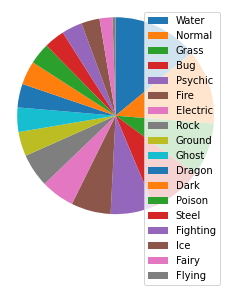

In [62]:
plt.pie(type_counts, labels = type_counts.index, startangle = 90, counterclock = False,labeldistance = None)
plt.legend()
plt.axis('square');

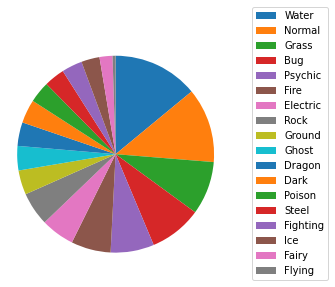

In [63]:
plt.pie(type_counts,labels=type_counts.index,startangle=90,counterclock=False,labeldistance=None)
#labeldistance: The radial distance at which pie labels are drawn.
#If labeldistance is set to None, labels are not drawn, but are stored for use in legend()
plt.legend(loc=0,bbox_to_anchor=(1,0.7,0.5,0.5))
plt.axis("square");

A variant of the pie chart, the donut plot, is very similar except that the center of the circle has been removed.

Some statistics might be reported in the hole of a donut plot to better make use of available space.

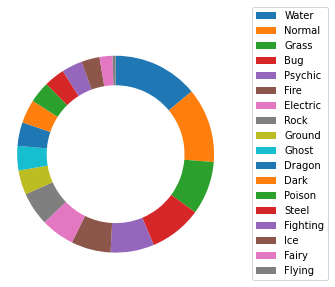

In [64]:
plt.pie(type_counts, labels = type_counts.index, labeldistance = None, startangle = 90, counterclock = False, 
       wedgeprops = {'width':0.3})
plt.legend(loc = 'best', bbox_to_anchor = (1, 0.7, 0.5, 0.5))
plt.axis('square');

Pie charts and donut plots are fairly limited in the range of scenarios where they can be used and they are more difficult to read.

It's very difficult to get an accurate estimate of relative frequency using pie or donut plots alone especially if there are a lot of categories.

**Qualitative variable represntation**
1. **Bar charts**

sns.countplot

Used for plotting both absolute and relative frequencies.

sns.barplot

Used to plot a quantitative variable against the levels of a second qualitative variables.

2. **Pie charts (& donut plot)**

plt.pie
Used for plotting relative frequencies for qualitative variables.
This function requires the data to be in a summarized form.

**Histograms**

1. Used for plotting quantitative variables.

2. Due to the numeric nature of the data, bars in a histogram don't indicate counts on single values but instead count on value ranges.

3. Values are grouped into continuous bins, and one bar for each bin is plotted depicting the number.

4. Normally, bins include values on their left end, and exclude values on their right end, except for the rightmost bin edge.

In [65]:
pokemon.head(3)

,Sn no,Name,Upper Name,lower name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,BULBASAUR,bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,IVYSAUR,ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,VENUSAUR,venusaur,Grass,Poison,80,82,83,100,100,80,1,False


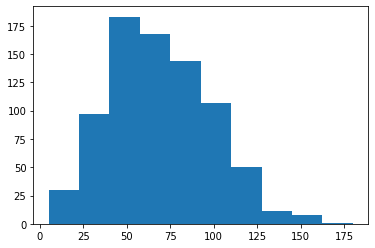

In [66]:
plt.hist(data=pokemon,x="Speed");

The direct adjacency of the bars in a histogram emphasize the fact that the data takes on a continuous range of values.

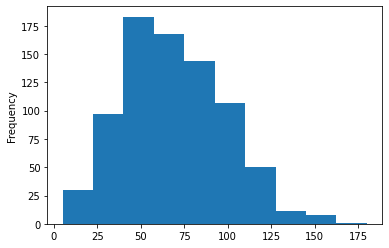

In [67]:
pokemon["Speed"].plot(kind="hist")

By default, matplotlib will split the data into 10 bins which is usually too few to understand the distribution of the data.

The number of bins can be changed through the bins parameter.

bins : int or sequence or str, optional

If bins is an integer, it defines the number of equal-width bins in the range.

If bins is a sequence, it defines the bin edges, including the left edge of the first bin and the right edge of the last bin; in this case, bins may be unequally spaced. All but the last (righthand-most) bin is half-open. In other words, if bins is: [1, 2, 3, 4] then the first bin is [1, 2) (including 1, but excluding 2) and the second [2, 3). The last bin, however, is [3, 4], which includes 4.

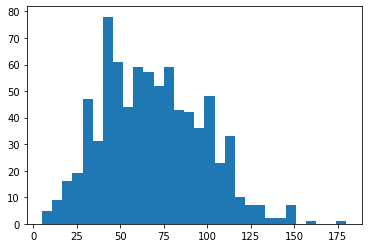

In [68]:
#higher number of bins reveals more details, but the bin boundaries are still awkward
#Some bins cover more integer values than others
plt.hist(data=pokemon,x="Speed",bins=30);

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180]


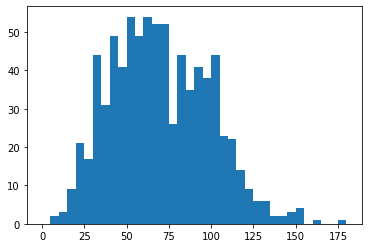

In [69]:
bins=np.arange(0,pokemon["Speed"].max()+5,5)
print(bins)
plt.hist(data=pokemon,x="Speed",bins=bins);

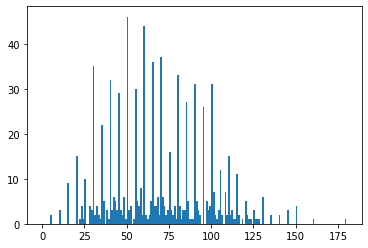

In [70]:
bins = np.arange(0,pokemon["Speed"].max()+1,1)
plt.hist(data=pokemon,bins=bins,x="Speed");

If bin size is too large, then you may end up losing a lot of information about the overall distribution of data.

On the opposite side, a too small bin size can introduce noise that can distract from the main trends in you data.

Seaborn also has a function for creating histograms, sns.distplot(), which only takes as an argument the pandas Series containing all the data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


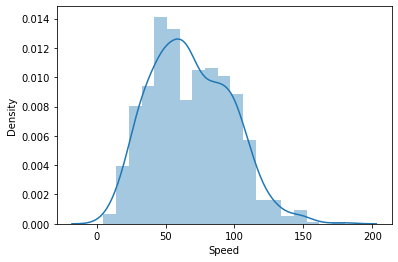

In [71]:
sns.distplot(pokemon["Speed"]);

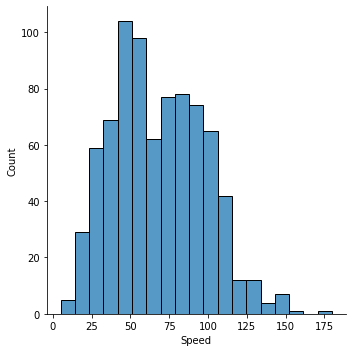

In [72]:
#figure level function
sns.displot(pokemon["Speed"])

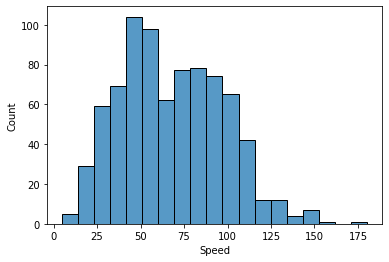

In [73]:
#axis level function
sns.histplot(pokemon["Speed"]);

In sns.distplot(), the dafault bin count is larger than in matplotlib (has a better bin-selection formula).

A line has been plotted over the bars, and the y axis values are really small.

The line is a density curve estimate of the data distribution, and the total area under the curve is set to be equal to 1.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


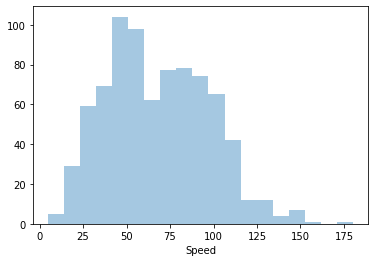

In [74]:
#Turn off the density curve
sns.distplot(pokemon["Speed"],kde=False)

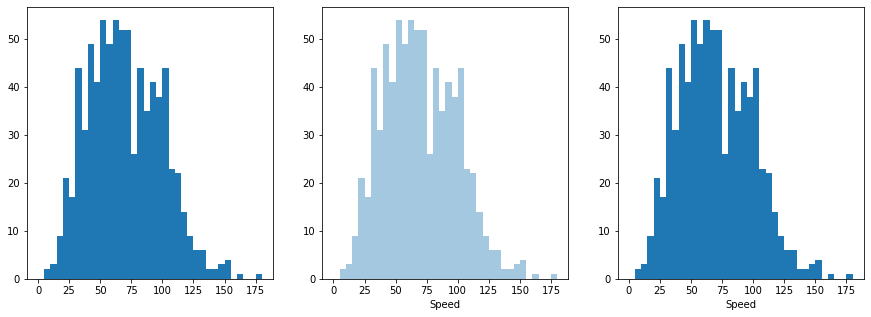

In [75]:
bin_edges = np.arange(0,pokemon["Speed"].max()+5,5)
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(data=pokemon,x="Speed",bins=bin_edges)
plt.subplot(132)
sns.distplot(pokemon["Speed"],bins=bin_edges,kde=False)
plt.subplot(133)
sns.distplot(pokemon["Speed"],kde=False,bins=bin_edges,hist_kws={"alpha":1});

**Figures, Axes, and Subplots**

The base of a visualization in matplotlib is a figure object. Contained withing each figure object is one or more axes objects, each of which contains a number of other elements that represents each plot.

We can explicitly set up the figure and axes objects.

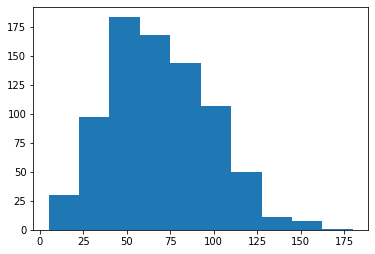

In [76]:
fig = plt.figure()
ax = fig.add_axes([0.125,0.125,0.775,0.775])
ax.hist(data=pokemon,x="Speed");

**fig.add_axes([left, bottom, width, height])** requires a list of arguments specifying the dimensions of the axes. The first two elements of the list specify the position of the lower left hand corner of the axes. The other two elements specify the axes width and height in relation to the figure size, respectively.

To use axes object with seaborn, seaborn function usually have an ax parameter to specify upon which axes a plot will be drawn.

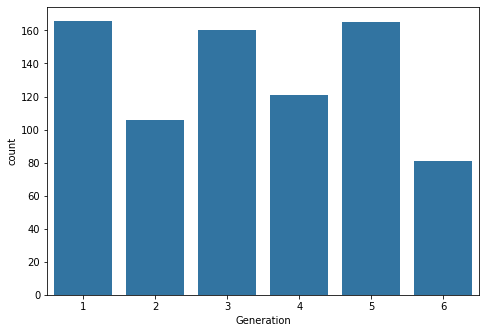

In [77]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = pokemon, x = 'Generation', ax = ax, color = base_color);

In the above case, there was no purpose to go through the figure and axes creation steps. And indeed, in most cases, you can just use the basic matplotlib and seaborn functions as is. Each function targets a figure or axes, and they will automatically use the most recent figure or axes worked with.

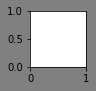

In [78]:
fig = plt.figure(facecolor = 'grey', figsize = (1,1))
ax = fig.add_axes([0.125, 0.125, 0.775, 0.775])

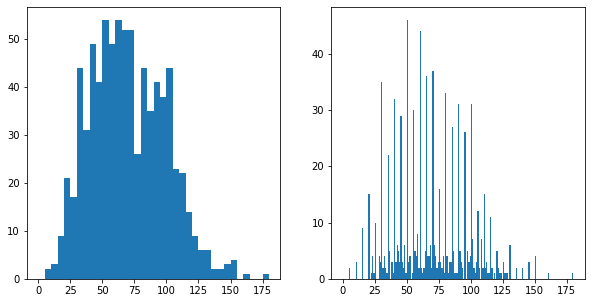

In [79]:
plt.figure(figsize = [10, 5])
'''Creates a new figure object without assigning any variable to return the function's output.
Matplotlib and seaborn functions use the most recent figure or axes objects worked with. So any further plotting calls that
need a figure object will refer to that figure as the active one'''

plt.subplot(1,2,1)
'''Creates a new axes in our figure. The first two arguments say to divide the figure into one row and two columns, and the
third argument says to create a new axes in the first slot.'''

bin_edges = np.arange(0, pokemon['Speed'].max() + 5, 5)
plt.hist(data = pokemon, x = 'Speed', bins = bin_edges, color = base_color);
plt.subplot(1,2,2)
bin_edges = np.arange(0, pokemon['Speed'].max() + 1, 1)
plt.hist(data = pokemon, x = 'Speed', bins = bin_edges, color = base_color);

1. Get a list of all axes in a figure

plt.get_axes()
2. Retrieve the curret axes

plt.gca()
3. Set a particular axes as the active one

plt.sca()
4. Add an axes to a figure object

fig.add_axes
5. Add a subplot to a figure object

fig.add_subplot

plt.subplot
6. Create a new figure with a bunch of subplots

fig, axes = plt.subplots(3,4, figsize = (15, 15)) Creates one figure object, and a grid of 3 x 4 grid of subplots (12 axes)

7. Alter the dimensions of a figure object after it has already been created

fig.set_figwidth(10)

fig.set_figheight(10)

**fig.add_axes() vs fig.add_subplot()**

https://stackoverflow.com/questions/43326680/what-are-the-differences-between-add-axes-and-add-subplot/43330553

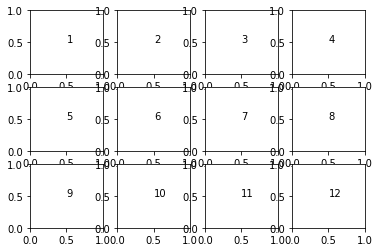

In [80]:
fig, axes = plt.subplots(3,4)
for i in range(len(fig.get_axes())):
    axes = axes.flatten()
    #flatten reshape the 3 x 4 array into a 12-element vector
    ax = plt.sca(axes[i])
    plt.text(0.5, 0.5, i + 1)

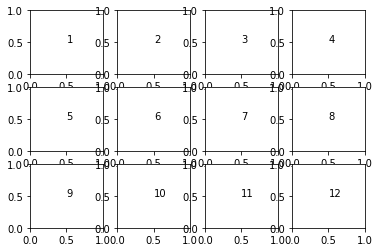

In [81]:
fig, axes = plt.subplots(3,4)
for i in range(len(fig.get_axes())):
    plt.sca(fig.get_axes()[i])
    plt.text(0.5, 0.5, i+1)

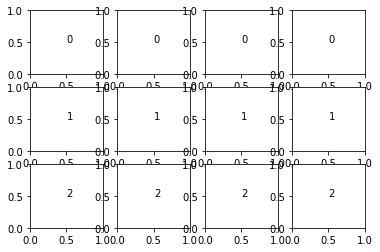

In [82]:
fig, axes = plt.subplots(3,4)
for i in [0, 1, 2]:
    for j in [0, 1, 2, 3]:
        ax = plt.sca(axes[i][j])
        plt.text(0.5, 0.5, i)

**Choosing a Plot for Discrete Data**

If you want to plot a discrete quantitative variable, it is possible to select either a histogram or a bar chart to depict the data.

The histogram is the most immediate choice since the data is numeric.

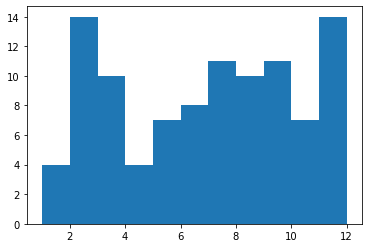

In [83]:
die_rolls = pd.Series(np.random.randint(1,13, size = 100))
bin_edges = np.arange(1,12+1, 1)
plt.hist(die_rolls, bins = bin_edges);

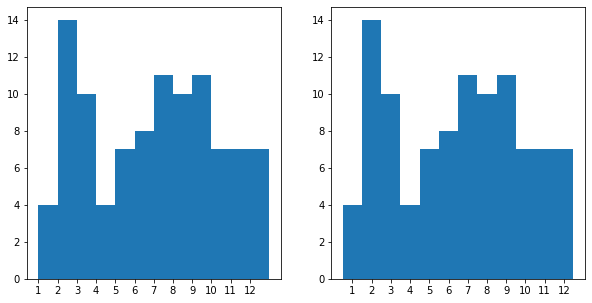

In [84]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
bin_edges = np.arange(1, 12 + 1.1, 1)
plt.xticks(np.arange(1,13,1))
plt.hist(die_rolls, bins = bin_edges)
plt.subplot(1,2,2)
bin_edges = np.arange(0.5, 12.5 + 1, 1)
plt.hist(die_rolls, bins = bin_edges)
plt.xticks(np.arange(1,13, 1));

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


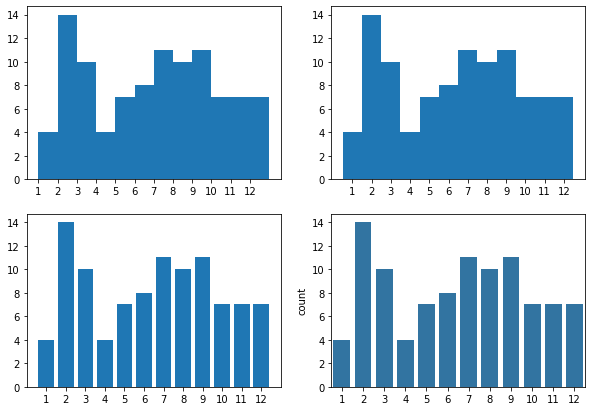

In [85]:
plt.figure(figsize = [10, 7])
plt.subplot(2,2,1)
bin_edges = np.arange(1, 12 + 1.1, 1)
plt.hist(die_rolls, bins = bin_edges)
plt.xticks(np.arange(1,12 + 1,1))
plt.subplot(2,2,2)
bin_edges = np.arange(0.5, 12.5 + 1, 1)
plt.hist(die_rolls, bins = bin_edges)
plt.xticks(np.arange(1,12 + 1, 1))
plt.subplot(2,2,3)
in_edges = np.arange(0.5, 12.5 + 1, 1)
plt.hist(die_rolls, bins = bin_edges, rwidth = 0.8)
#rwidth: the width of the bar as a fraction of the bin width
plt.xticks(np.arange(1,12 + 1, 1))
plt.subplot(2,2,4)
sns.countplot(die_rolls, color = base_color);

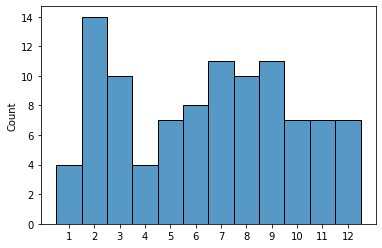

In [86]:
bin_edges = np.arange(1,13+1, 1)
sns.histplot(die_rolls, bins = bin_edges)
plt.xticks(np.arange(1.5,13.5,1), np.arange(1,13,1));

By adding gaps between the bars, you emphasize the fact that the data is discrete in nature.


For continuous numeric data, you shouldn't make use of the rwidth parameter since the gaps imply discreteness of values.


Be careful about using sns.countplot() function to plot the distribution of a discrete numeric variable as bars, since each unique numeric value will get a bar regardless of the spacing between bars.


If your data is discrete numeric, you shouldn't probably consider either of the above two variants unless the number of unique values is small enough to allow for the half unit shift or discrete bars to be interpretable.


If you have a large number of unique values over a large enough range, it's better to stick with the standard histogram.

**Descriptive Statistics, Outliers, and Axis Limits**

Visualizations gives you insights into the data that you can't get from descriptive statistics. It allows you to understand the data faster than the statistics would be able to allow.

Plots can also highlight areas of the data where we need to perform further inspection.

In a histogram, one of the most salient bits of information that you can observe is whether or not there are outliers in your data.

If you have a highly skewed data, you might want to change the range of the data plotted in order to zoom into parts that are more interesting.

You can change a histogram's axis limits through plt.xlim() function call. This function takes a tuple of two numbers specifying the upper and lower bounds of the x axis range.

In [87]:
pokemon.head()

,Sn no,Name,Upper Name,lower name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,BULBASAUR,bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,IVYSAUR,ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,VENUSAUR,venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,VENUSAURMEGA VENUSAUR,venusaurmega venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,CHARMANDER,charmander,Fire,NaN,39,52,43,60,50,65,1,False


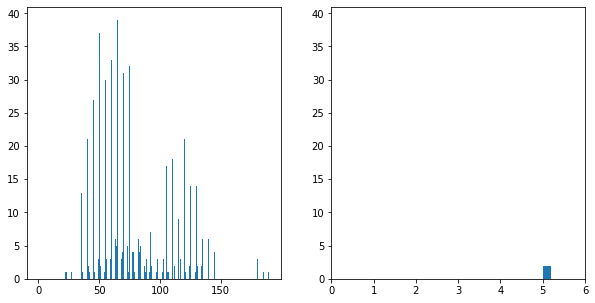

In [88]:
plt.figure(figsize=(10,5))
plt.subplot(121)
bin_edges= np.arange(0,pokemon["Attack"].max()+0.5,0.5)
plt.hist(data=pokemon,x="Attack",bins=bin_edges)
plt.subplot(122)
bin = np.arange(0,pokemon["Attack"].max()+0.2,0.2)
plt.hist(data=pokemon,x="Attack",bins=bin)
plt.xlim((0,6))
plt.show()

**Scales and Transformation**

In some cases, you might want to change the scale of the plot (e.g., from a linear scale to a logarithmic scale).

The standard assumption is that your data should be interpreted linearly, with differences being the salinet points of attention. In other cases, you might be interested in differences in terms of ratios or percentages.

The classic example of a variable that might require a different scale is data dealing with finanace.

Variables like this tend to have a range of values that crosses many orders of magnitude, and are usually skewed to the right.

In [89]:
prices = pd.Series([4500, 7400, 8800, 9600, 11600, 12900, 14000, 19400, 25800, 26000, 27800, 35200, 41600, 43500, 56400,
                   57900, 72500, 85000, 140000, 198000])

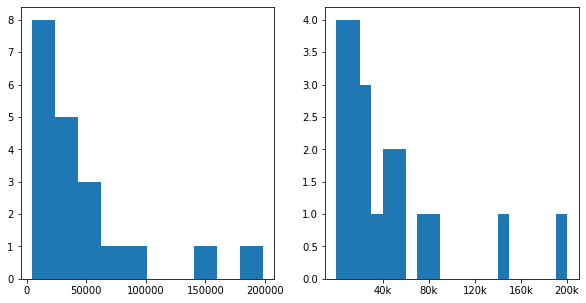

In [90]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(prices)
plt.subplot(122)
bin_edges = np.arange(0,prices.max()+10000,10000)
plt.hist(prices,bins=bin_edges)
ticks = [40000,80000,120000,160000,200000]
plt.xticks(ticks,['40k','80k','120k','160k','200k']);

Using a linear scale resulted in an unevenly balanced plot with a lot of gaps in order to capture the highest values points.

With a linear model in mind, it would be difficult for a predictor variable to capture small differences at the low end of the scale at the same time as large distances at the high end.

3.6532125137753435
5.296665190261531


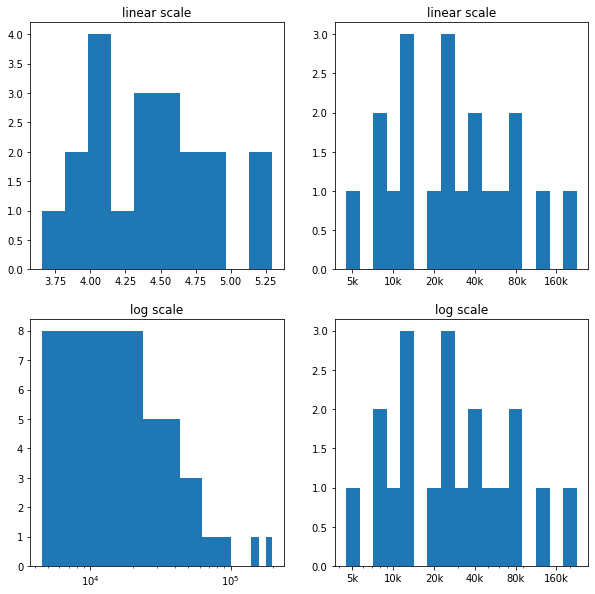

In [91]:
plt.figure(figsize=(10,10))
plt.subplot(221)
log_prices = np.log10(prices)
plt.hist(log_prices)
plt.gca().set_title("linear scale");

plt.subplot(222)
min = log_prices.describe()["min"]
max = log_prices.describe()["max"]
print(min)
print(max)
bin_edges = np.arange(min,max+0.1,0.1)
plt.hist(log_prices,bins=bin_edges)
ticks = [5000,10000,20000,40000,80000,160000]
tick_loc = [np.log10(i) for i in ticks]
plt.xticks(tick_loc,["5k","10k","20k","40k"," 80k","160k"])
plt.gca().set_title("linear scale");

plt.subplot(223)
plt.hist(prices)
plt.xscale("log")
plt.gca().set_title("log scale")

plt.subplot(224)
bin_edges = 10**np.arange(min,max+0.1,0.1)
plt.hist(prices,bins=bin_edges)
plt.xscale("log")
ticks = [5000,10000,20000,40000,80000,160000]
plt.xticks(ticks,["5k","10k","20k","40k","80k","160k"])
plt.gca().set_title("log scale");

When a logarithimic scaling is applied, the distances on the scaled axis represents multiplicative differences rather than arithmetic differences.

All the values in a variable must be positive in order to use a log transform.


An alternative approach to axis transformation is to start by applying the transformation directly to the data. When we plot the transform data on a linear scale, we get the exact same picture as the original data plotted on a log scale. However, to interpret the values, we need to mentally apply the inverse transformation.

In [93]:
pokemon.head(3)

,Sn no,Name,Upper Name,lower name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,BULBASAUR,bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,IVYSAUR,ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,VENUSAUR,venusaur,Grass,Poison,80,82,83,100,100,80,1,False


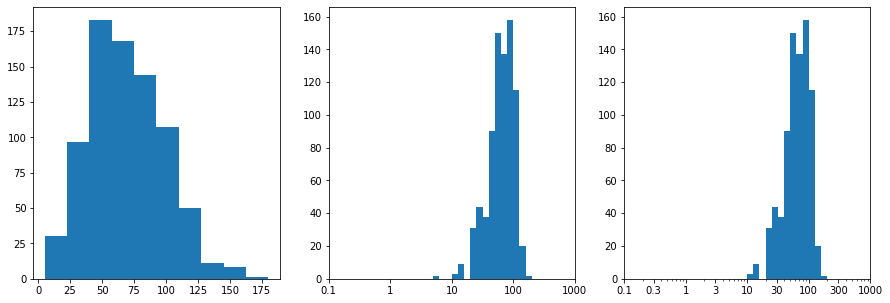

In [99]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(data=pokemon,x="Speed")

plt.subplot(132)
log_wt = np.log10(pokemon["Speed"])
min = log_wt.min()
max = log_wt.max()
bin_edges = np.arange(min,max+0.1,0.1)
plt.hist(log_wt,bins=bin_edges)
tick_loc = [-1,0,1,2,3]
tick_labels = [10**x for x in tick_loc]
plt.xticks(tick_loc,tick_labels);

plt.subplot(133)
bin_edges = 10** np.arange(min,max+0.1,0.1)
plt.hist(data=pokemon,x="Speed",bins=bin_edges)
plt.xscale("log")
ticks = [0.1,0.3,1,3,10,30,100,300,1000]
plt.xticks(ticks,ticks);

One common distribution that results from the logarithmic distribution is the log-normal distribution.

Log-Normal distribution: it is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution.

Under this distribution, linear changes in predictor features will result in multiplicative effects in the response.

Axis Transformations are useful because they allow you to interpret your data with their naturally recordedd units.

In a scale transformation, the gaps between values are based on the transformed scale, but you can interpret them in the variable's natural units.

**Additional Variation**

If you want to use a different transformation that is not available in xscale, then you'll have to perform some feature engineering.


You will need to write a function that applies both the transformation and its inverse.


The inverse will be useful in cases where we specify values in their transformed units and need to get the natural units back.

Applying the log transfrmation using a function instead

In [101]:
def log_trasform(x,inverse=False):
  if not inverse:
    return np.log10(x)
  else:
      return 10**x

In [103]:
min = log_trasform(pokemon['Speed'].min())
max = log_trasform(pokemon["Speed"].max())

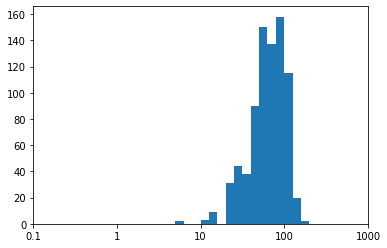

In [107]:
bin_edges = np.arange(min,max+0.1,0.1)
plt.hist(log_trasform(pokemon["Speed"]),bins=bin_edges)
tick_loc = [-1,0,1,2,3]
plt.xticks(tick_loc,[log_trasform(i,inverse=True) for i in tick_loc]);

In [108]:
areas = np.abs(50 * np.random.randn(200) + 100)

In [109]:
adds = [300, 350, 400, 425, 800, 900, 1000, 1100, 980, 755,357,880,987,863,430,340,1050,1000,900,600,700,600]
areas = pd.Series(np.append(areas, adds))

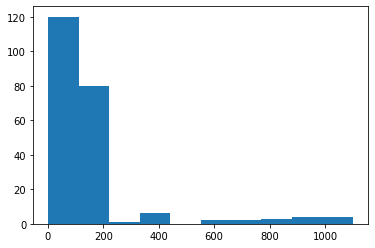

In [110]:
plt.hist(areas);

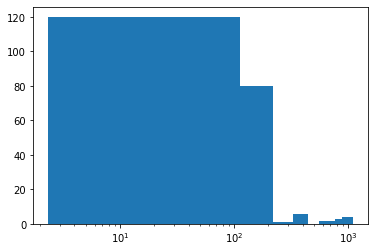

In [111]:
plt.hist(areas)
plt.xscale('log');

logarithmic scale

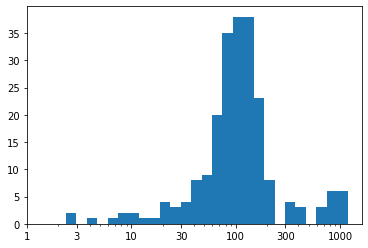

In [112]:
mi = np.log10(areas.describe())['min']
ma = np.log10(areas.describe())['max']
bin_edges = 10 ** np.arange(mi, ma + 0.1, 0.1)
plt.hist(areas, bins = bin_edges)
plt.xscale('log')
ticks = [1, 3, 10, 30, 100, 300, 1000]
plt.xticks(ticks, ticks);

In [113]:
def sqrt_trans(data, inverse = False):
    if not inverse:
        return np.sqrt(data)
    else:
        return data ** 2

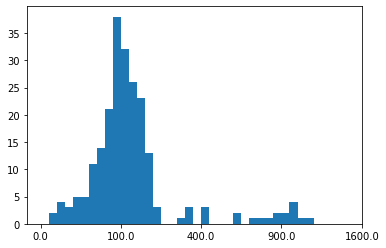

In [114]:
bin_edges = np.arange(0, sqrt_trans(areas.max()) + 1, 1)
plt.hist(areas.map(sqrt_trans), bins = bin_edges)
ticks = np.arange(0, sqrt_trans(areas.max()) + 10, 10)
plt.xticks(ticks, sqrt_trans(ticks, inverse = True));